# 1. Configuration de l'environnement
## Importation des bibliothèques nécessaires

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
%matplotlib inline

print("Bibliothèques importées avec succès.")

Bibliothèques importées avec succès.


## Chargement et aperçu du dataset
Lecture du fichier `base_seg_gsm.csv` et affichage des premières lignes.

In [18]:
# Chargement des données

df = pd.read_csv("base_seg_gsm.csv")
print(f"Dataset chargé avec succès ! Dimensions : {df.shape}")
display(df.head())


Dataset chargé avec succès ! Dimensions : (8000, 13)


,ID,MMPR,FREQR,POIDS_VAS,POIDS_IN,POIDS_IN_OFFN,POIDS_OPK,POIDS_ONG,POIDS_INT,POIDS_ONN,SMART_PHONE,MULTI_EQUIPE,USERS_INTERNET
0,6.0,20.0,5.0,0.012244,0.032905,0.800251,0.912323,0.301724,0.571299,0.960274,0.0,0.0,0.0
1,18.0,20.0,1.0,0.000000,0.930400,0.254946,0.642126,0.000000,0.604382,0.694052,0.0,0.0,0.0
2,62.0,10.0,1.0,0.152091,0.623734,0.693735,0.283647,0.000000,0.518100,0.360347,0.0,0.0,0.0
3,109.0,0.0,0.0,0.000000,0.791667,0.848297,0.181373,0.000000,0.879562,0.328431,0.0,0.0,0.0
4,123.0,42.5,4.0,0.035871,0.205944,0.986124,0.117165,0.000000,0.807484,0.613069,1.0,0.0,0.0


# 2. Analyse Exploratoire des Données (EDA)
## Informations générales et statistiques descriptives
Vérification des types de données, des valeurs manquantes et résumé statistique des variables numériques.

In [19]:
# Informations sur les colonnes et types
print("--- Infos du DataFrame ---")
df.info()

print("\n--- Statistiques descriptives ---")
# Affichage transposé pour une meilleure lisibilité
display(df.describe().T)

print("\n--- Vérification des valeurs manquantes ---")
print(df.isnull().sum())

--- Infos du DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              8000 non-null   float64
 1   MMPR            8000 non-null   float64
 2   FREQR           8000 non-null   float64
 3   POIDS_VAS       8000 non-null   float64
 4   POIDS_IN        8000 non-null   float64
 5   POIDS_IN_OFFN   8000 non-null   float64
 6   POIDS_OPK       8000 non-null   float64
 7   POIDS_ONG       8000 non-null   float64
 8   POIDS_INT       8000 non-null   float64
 9   POIDS_ONN       8000 non-null   float64
 10  SMART_PHONE     8000 non-null   float64
 11  MULTI_EQUIPE    8000 non-null   float64
 12  USERS_INTERNET  8000 non-null   float64
dtypes: float64(13)
memory usage: 812.6 KB

--- Statistiques descriptives ---


,count,mean,std,min,25%,50%,75%,max
ID,8000.0,4000.500000,2309.545410,1.0,2000.750000,4.000500e+03,6000.250000,8000.000000
MMPR,8000.0,14.854495,12.584311,0.0,10.000000,1.375000e+01,20.000000,250.000000
FREQR,8000.0,5.218375,7.586048,0.0,1.000000,3.000000e+00,6.000000,116.000000
POIDS_VAS,8000.0,0.104456,0.207971,0.0,0.000000,1.049028e-11,0.100200,1.000000
POIDS_IN,8000.0,0.405651,0.377379,0.0,0.024068,3.053337e-01,0.781187,1.000000
POIDS_IN_OFFN,8000.0,0.201513,0.301497,0.0,0.000391,3.233159e-02,0.294433,0.999928
POIDS_OPK,8000.0,0.492158,0.310413,0.0,0.219915,4.920279e-01,0.759924,1.000000
POIDS_ONG,8000.0,0.281528,0.391424,0.0,0.000000,0.000000e+00,0.638264,1.000000
POIDS_INT,8000.0,0.047899,0.167504,0.0,0.000000,0.000000e+00,0.000000,1.000000
POIDS_ONN,8000.0,0.823016,0.243414,0.0,0.745797,9.402037e-01,0.988559,1.000000



--- Vérification des valeurs manquantes ---
ID                0
MMPR              0
FREQR             0
POIDS_VAS         0
POIDS_IN          0
POIDS_IN_OFFN     0
POIDS_OPK         0
POIDS_ONG         0
POIDS_INT         0
POIDS_ONN         0
SMART_PHONE       0
MULTI_EQUIPE      0
USERS_INTERNET    0
dtype: int64


## Visualisation des distributions
Analyse de la répartition des variables clés (`MMPR`, `FREQR`, `POIDS_...`) pour identifier les tendances et les valeurs aberrantes.

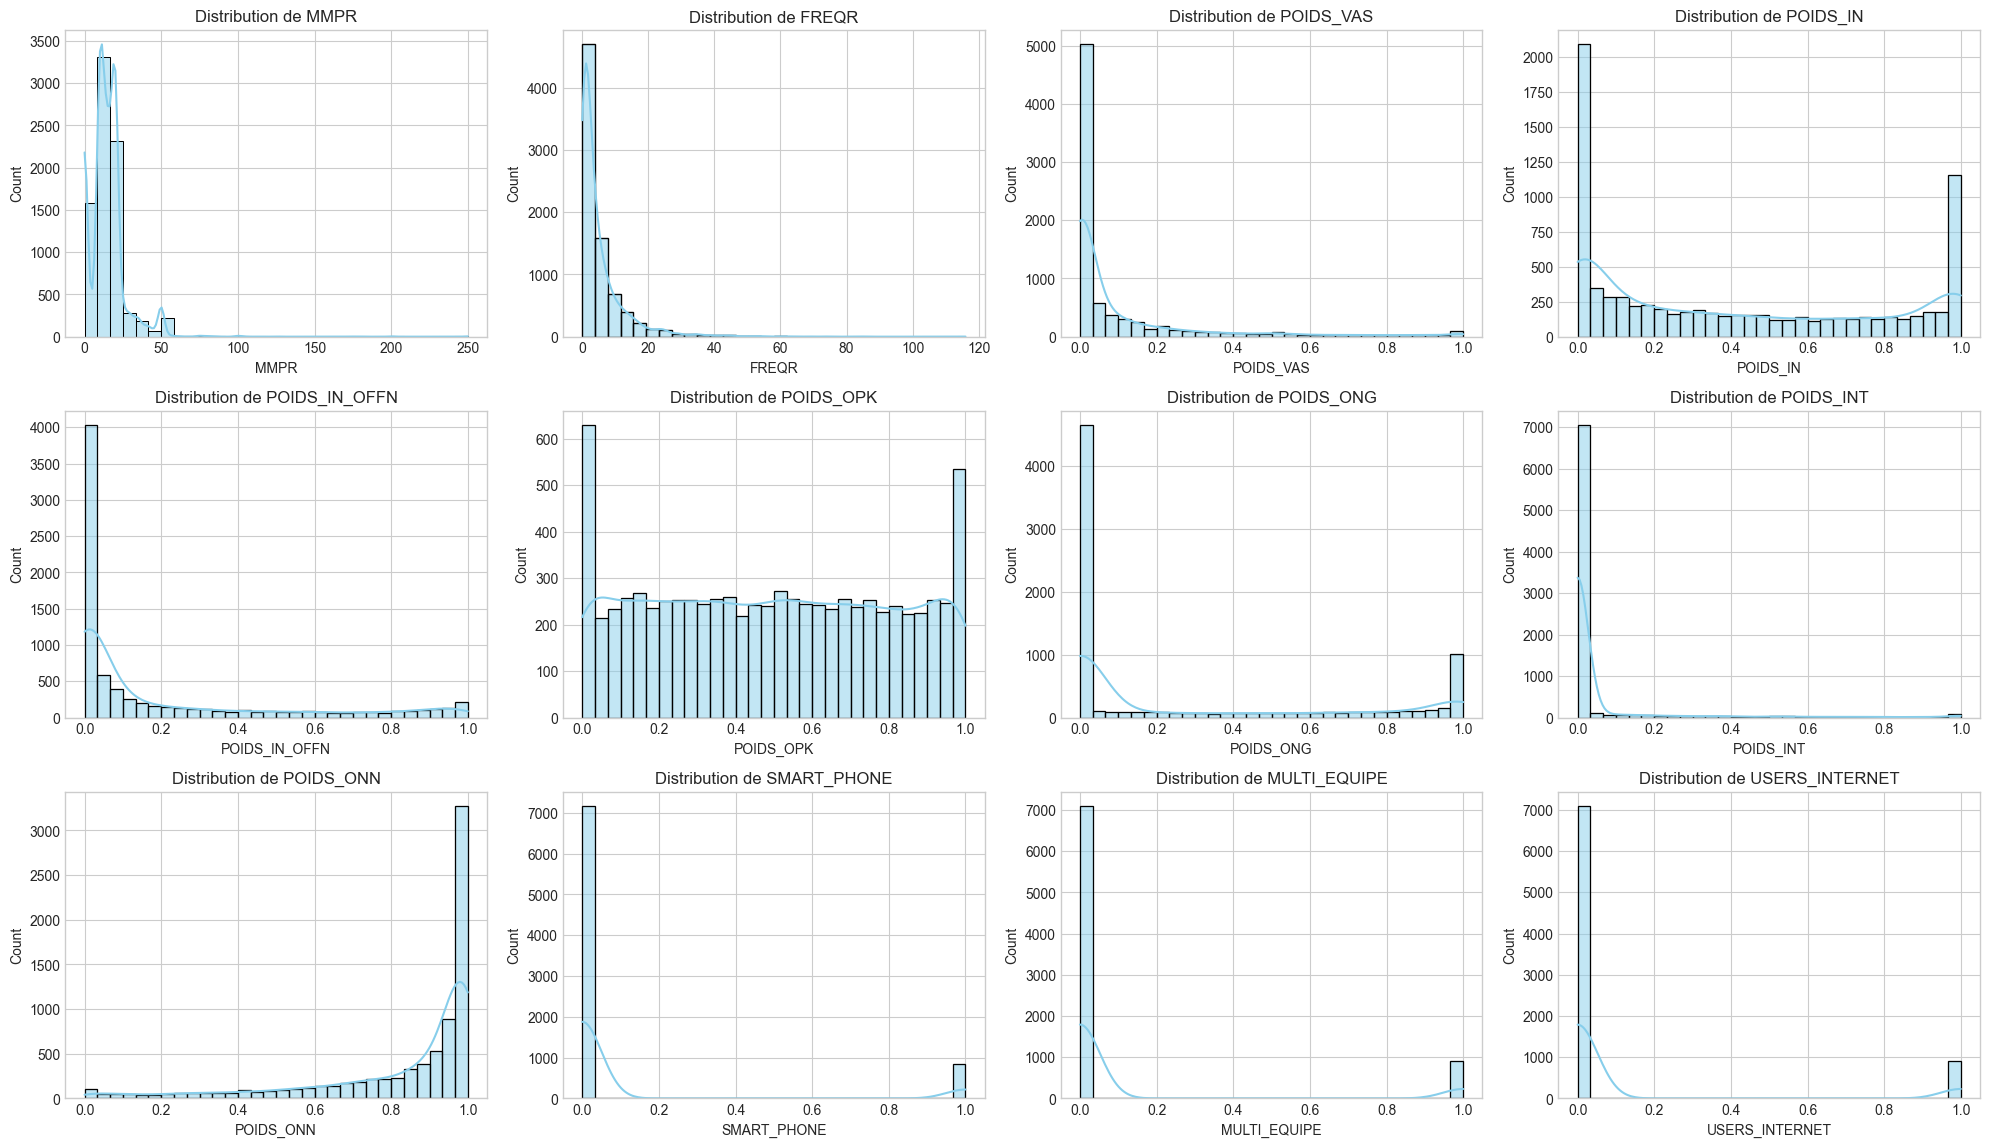

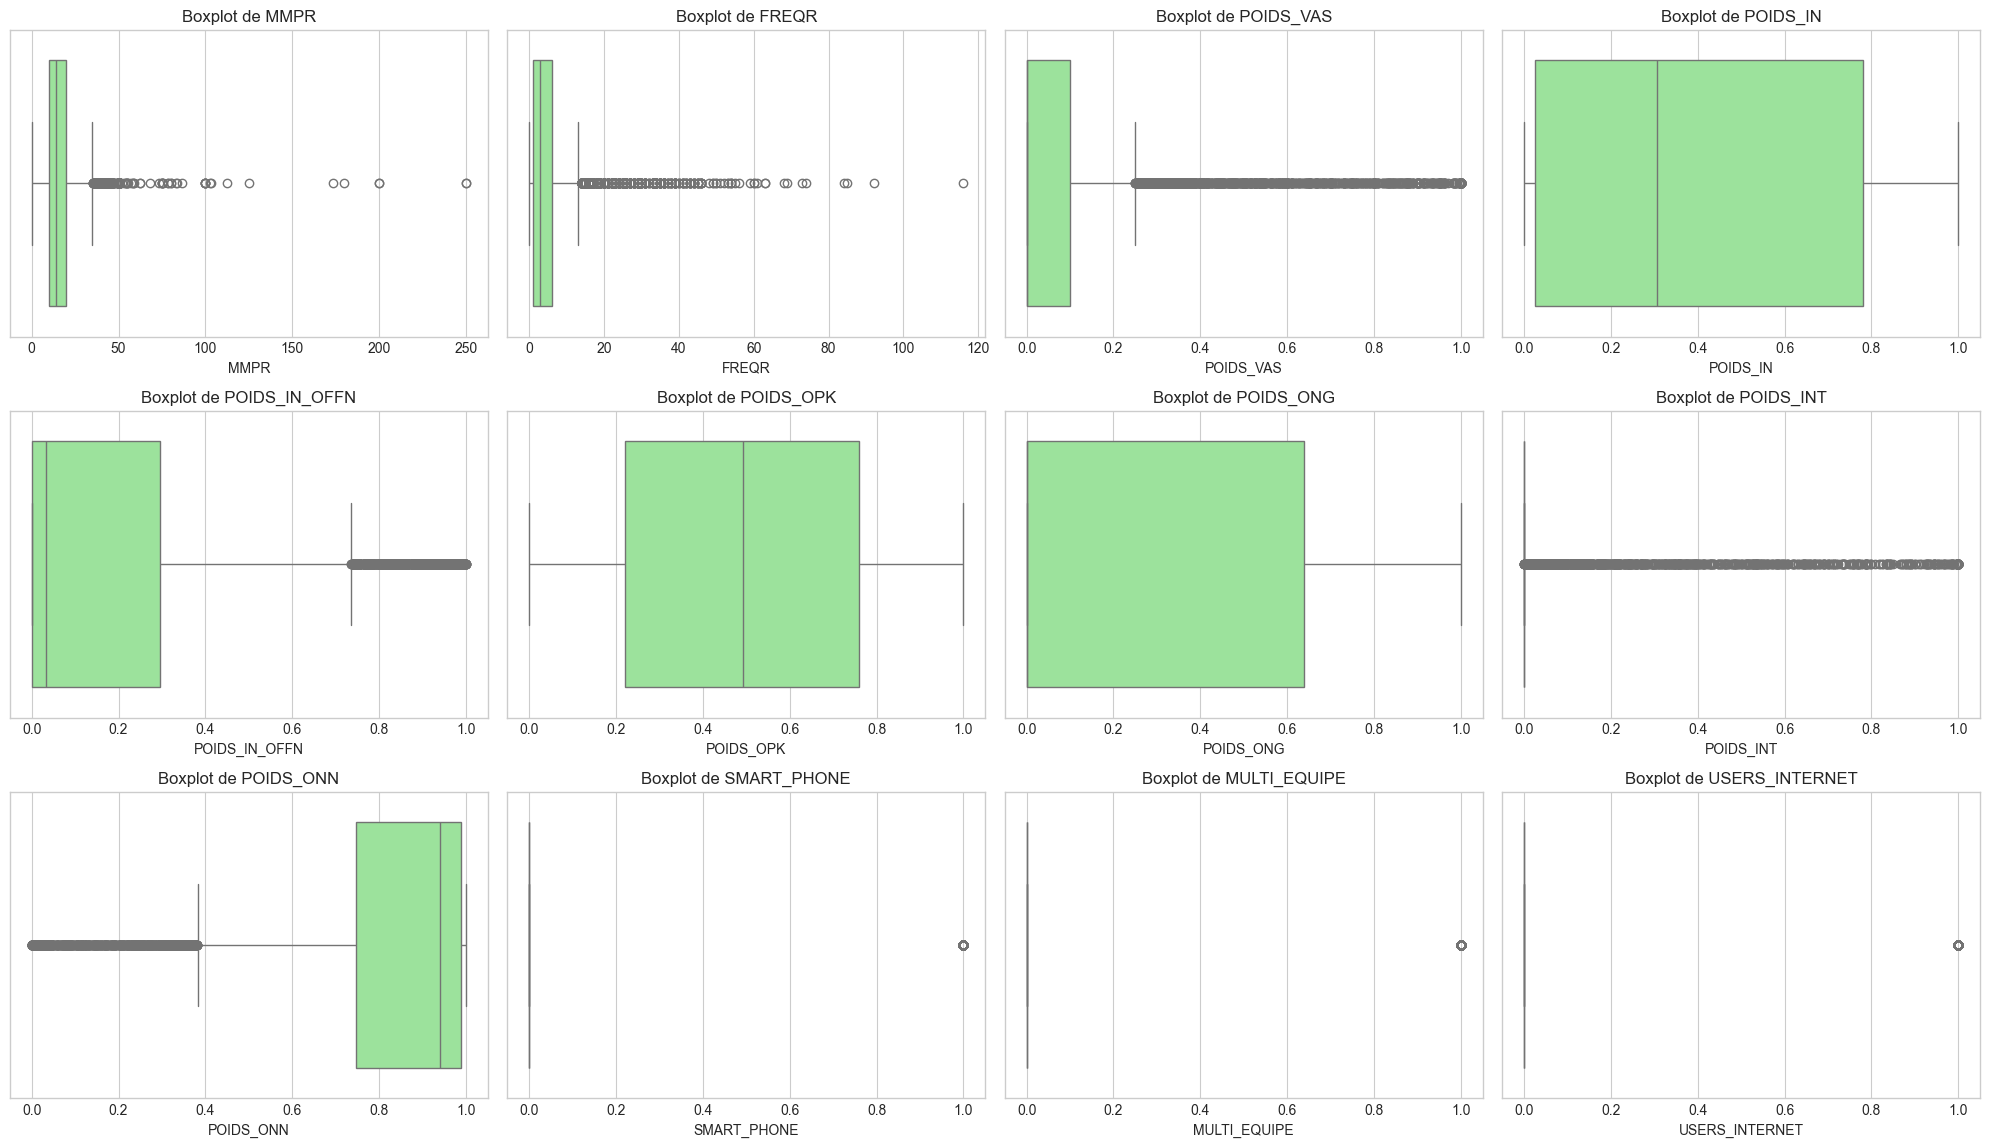

In [20]:
# Sélection des colonnes numériques (exclusion de l'ID si présent)
cols_numeriques = df.select_dtypes(include=['float64', 'int64']).columns
if 'ID' in cols_numeriques:
    cols_numeriques = cols_numeriques.drop('ID')

# Histogrammes
plt.figure(figsize=(20, 15))
for i, col in enumerate(cols_numeriques):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution de {col}')
    plt.tight_layout()
plt.show()

# Boxplots (pour mieux voir les outliers)
plt.figure(figsize=(20, 15))
for i, col in enumerate(cols_numeriques):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
plt.show()

## Analyse des corrélations
Utilisation d'une heatmap pour visualiser les relations linéaires entre les variables.
Points d'attention :
- Forte corrélation attendue entre usage Data et Smartphone.
- Liens entre valeur (MMPR) et fréquence (FREQR).

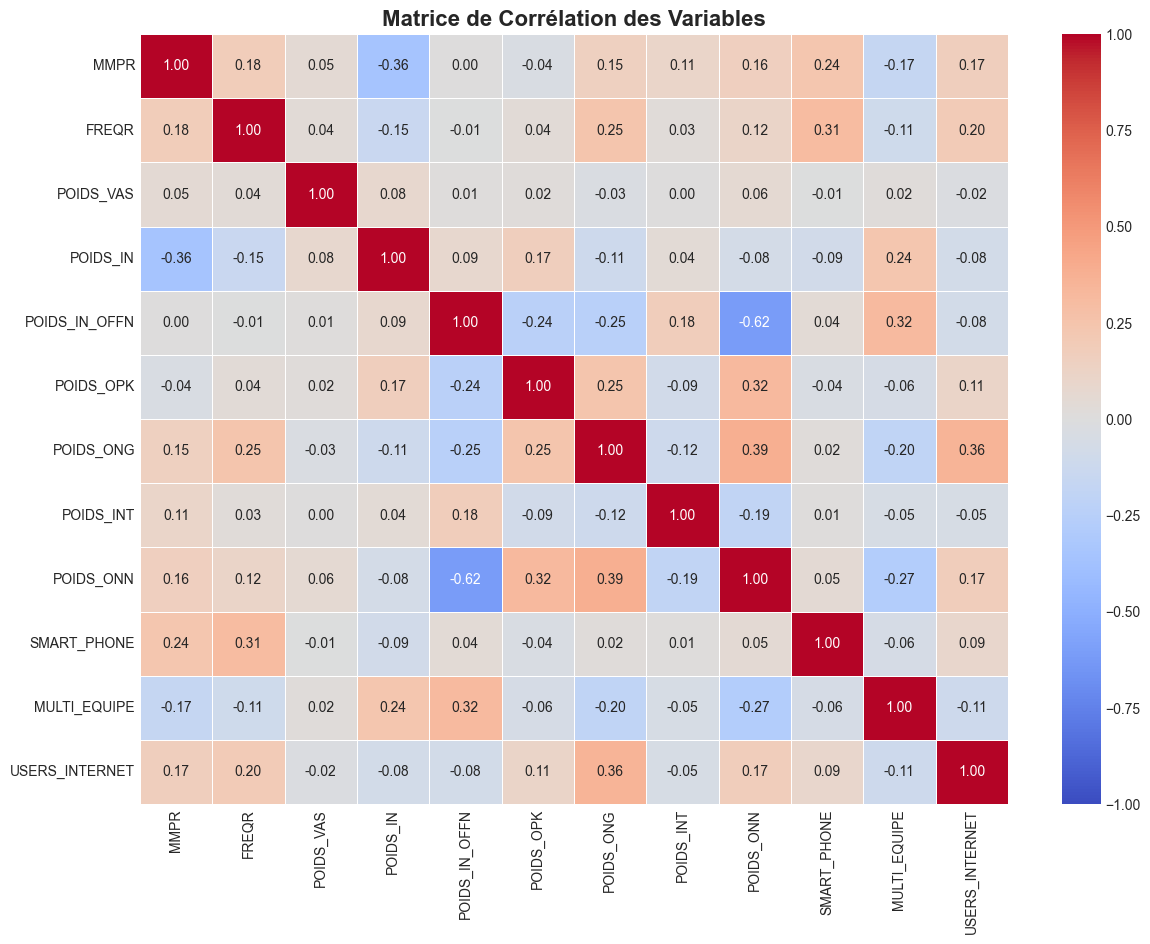

In [21]:
# Calcul de la matrice de corrélation
cols_corr = df.drop('ID', axis=1) # On enlève l'ID qui n'a pas de sens statistique
corr_matrix = cols_corr.corr()

# Affichage de la Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matrice de Corrélation des Variables', fontsize=16, fontweight='bold')
plt.show()

# 3. Préparation des données (Preprocessing)
## Standardisation
Le K-Means étant sensible aux échelles, nous allons centrer et réduire nos variables numériques (moyenne = 0, écart-type = 1).

In [22]:
# Sélection des features pour le clustering
features = df.columns.tolist()
if 'ID' in features:
    features.remove('ID')

# Standardisation (Centrage-Réduction)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Création d'un DataFrame pour vérifier le résultat
df_scaled = pd.DataFrame(X_scaled, columns=features)
print("Données standardisées. Aperçu des 5 premières lignes :")
display(df_scaled.head())

print("\n\nMoyennes :")
print(df_scaled.mean().round(2))
print("\nÉcart-types:")
print(df_scaled.std().round(2))

Données standardisées. Aperçu des 5 premières lignes :


,MMPR,FREQR,POIDS_VAS,POIDS_IN,POIDS_IN_OFFN,POIDS_OPK,POIDS_ONG,POIDS_INT,POIDS_ONN,SMART_PHONE,MULTI_EQUIPE,USERS_INTERNET
0,0.408908,-0.028788,-0.443414,-0.987784,1.986007,1.353652,0.051601,3.124888,0.563923,-0.341606,-0.358037,-0.358481
1,0.408908,-0.556105,-0.502294,1.390594,0.177235,0.483154,-0.719286,3.322410,-0.529849,-0.341606,-0.358037,-0.358481
2,-0.385782,-0.556105,0.229064,0.577924,1.632696,-0.671764,-0.719286,2.807269,-1.900867,-0.341606,-0.358037,-0.358481
3,-1.180472,-0.687934,-0.502294,1.022949,2.145375,-1.001263,-0.719286,4.965334,-2.031994,-0.341606,-0.358037,-0.358481
4,2.196960,-0.160617,-0.329804,-0.529227,2.602545,-1.208121,-0.719286,4.535001,-0.862564,2.927350,-0.358037,-0.358481




Moyennes :
MMPR             -0.0
FREQR            -0.0
POIDS_VAS         0.0
POIDS_IN          0.0
POIDS_IN_OFFN    -0.0
POIDS_OPK         0.0
POIDS_ONG        -0.0
POIDS_INT         0.0
POIDS_ONN         0.0
SMART_PHONE      -0.0
MULTI_EQUIPE     -0.0
USERS_INTERNET    0.0
dtype: float64

Écart-types:
MMPR              1.0
FREQR             1.0
POIDS_VAS         1.0
POIDS_IN          1.0
POIDS_IN_OFFN     1.0
POIDS_OPK         1.0
POIDS_ONG         1.0
POIDS_INT         1.0
POIDS_ONN         1.0
SMART_PHONE       1.0
MULTI_EQUIPE      1.0
USERS_INTERNET    1.0
dtype: float64


# 4. Modélisation : Segmentation par Clustering K-Means
Nous appliquons l'algorithme K-Means pour diviser nos 8000 clients en **8 segments distincts**, comme requis par le projet.

In [23]:
# Configuration du modèle K-Means avec K=8
k = 8
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Entraînement du modèle sur les données standardisées
kmeans.fit(X_scaled)

# Ajout des labels de cluster au DataFrame original (non standardisé)
# Cela nous permettra d'interpréter les résultats avec les vraies valeurs (ex: vrai montant MMPR)
df['Cluster'] = kmeans.labels_

print(f"Segmentation terminée avec {k} clusters.")
print("\nRépartition des clients par cluster :")
print(df['Cluster'].value_counts().sort_index())

# Calcul du coefficient de silhouette pour évaluer la qualité (entre -1 et 1)
# Plus c'est proche de 1, mieux les clusters sont séparés.
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f"\nScore de Silhouette global : {sil_score:.3f}")

Segmentation terminée avec 8 clusters.

Répartition des clients par cluster :
Cluster
0     736
1    1333
2    1432
3     488
4    2144
5     777
6     354
7     736
Name: count, dtype: int64

Score de Silhouette global : 0.221


# 5. Interprétation des Résultats : Profiling
Calcul des moyennes de chaque variable pour chaque cluster afin de comprendre le comportement type des clients de chaque segment.

In [24]:
# Sélection des colonnes à analyser (tout sauf ID et Cluster)
cols_analyse = [col for col in df.columns if col not in ['ID', 'Cluster']]

# Calcul des moyennes par cluster
cluster_means = df.groupby('Cluster')[cols_analyse].mean().round(2)

# Ajout de la taille de chaque cluster (nombre de clients)
cluster_means['Taille'] = df['Cluster'].value_counts()

# Tri par valeur (MMPR) décroissante pour faciliter la lecture
cluster_means = cluster_means.sort_values('MMPR', ascending=False)

# Affichage avec un dégradé de couleur
display(cluster_means.style.background_gradient(cmap='YlGnBu', axis=0))

,MMPR,FREQR,POIDS_VAS,POIDS_IN,POIDS_IN_OFFN,POIDS_OPK,POIDS_ONG,POIDS_INT,POIDS_ONN,SMART_PHONE,MULTI_EQUIPE,USERS_INTERNET,Taille
Cluster,,,,,,,,,,,,,
0,25.370000,13.800000,0.080000,0.270000,0.220000,0.460000,0.320000,0.040000,0.880000,0.990000,0.020000,0.210000,736
6,19.610000,4.860000,0.090000,0.470000,0.430000,0.360000,0.080000,0.740000,0.620000,0.060000,0.010000,0.010000,354
7,19.200000,7.070000,0.090000,0.330000,0.100000,0.610000,0.740000,0.010000,0.960000,0.020000,0.010000,1.000000,736
2,17.610000,7.140000,0.070000,0.340000,0.070000,0.630000,0.830000,0.010000,0.970000,0.000000,0.010000,0.000000,1432
4,15.030000,3.730000,0.050000,0.130000,0.150000,0.350000,0.050000,0.010000,0.780000,0.000000,0.000000,0.000000,2144
3,14.290000,4.330000,0.750000,0.500000,0.210000,0.490000,0.130000,0.020000,0.850000,0.050000,0.140000,0.020000,488
5,8.060000,2.940000,0.060000,0.610000,0.780000,0.310000,0.030000,0.030000,0.380000,0.040000,0.680000,0.010000,777
1,6.320000,1.530000,0.050000,0.860000,0.070000,0.670000,0.030000,0.010000,0.920000,0.010000,0.210000,0.000000,1333


# 6. Visualisation des Profils (Snake Plot)
Graphique montrant les écarts-types de chaque variable par rapport à la moyenne globale (ligne 0).
Permet d'identifier visuellement les pics caractéristiques de chaque cluster.

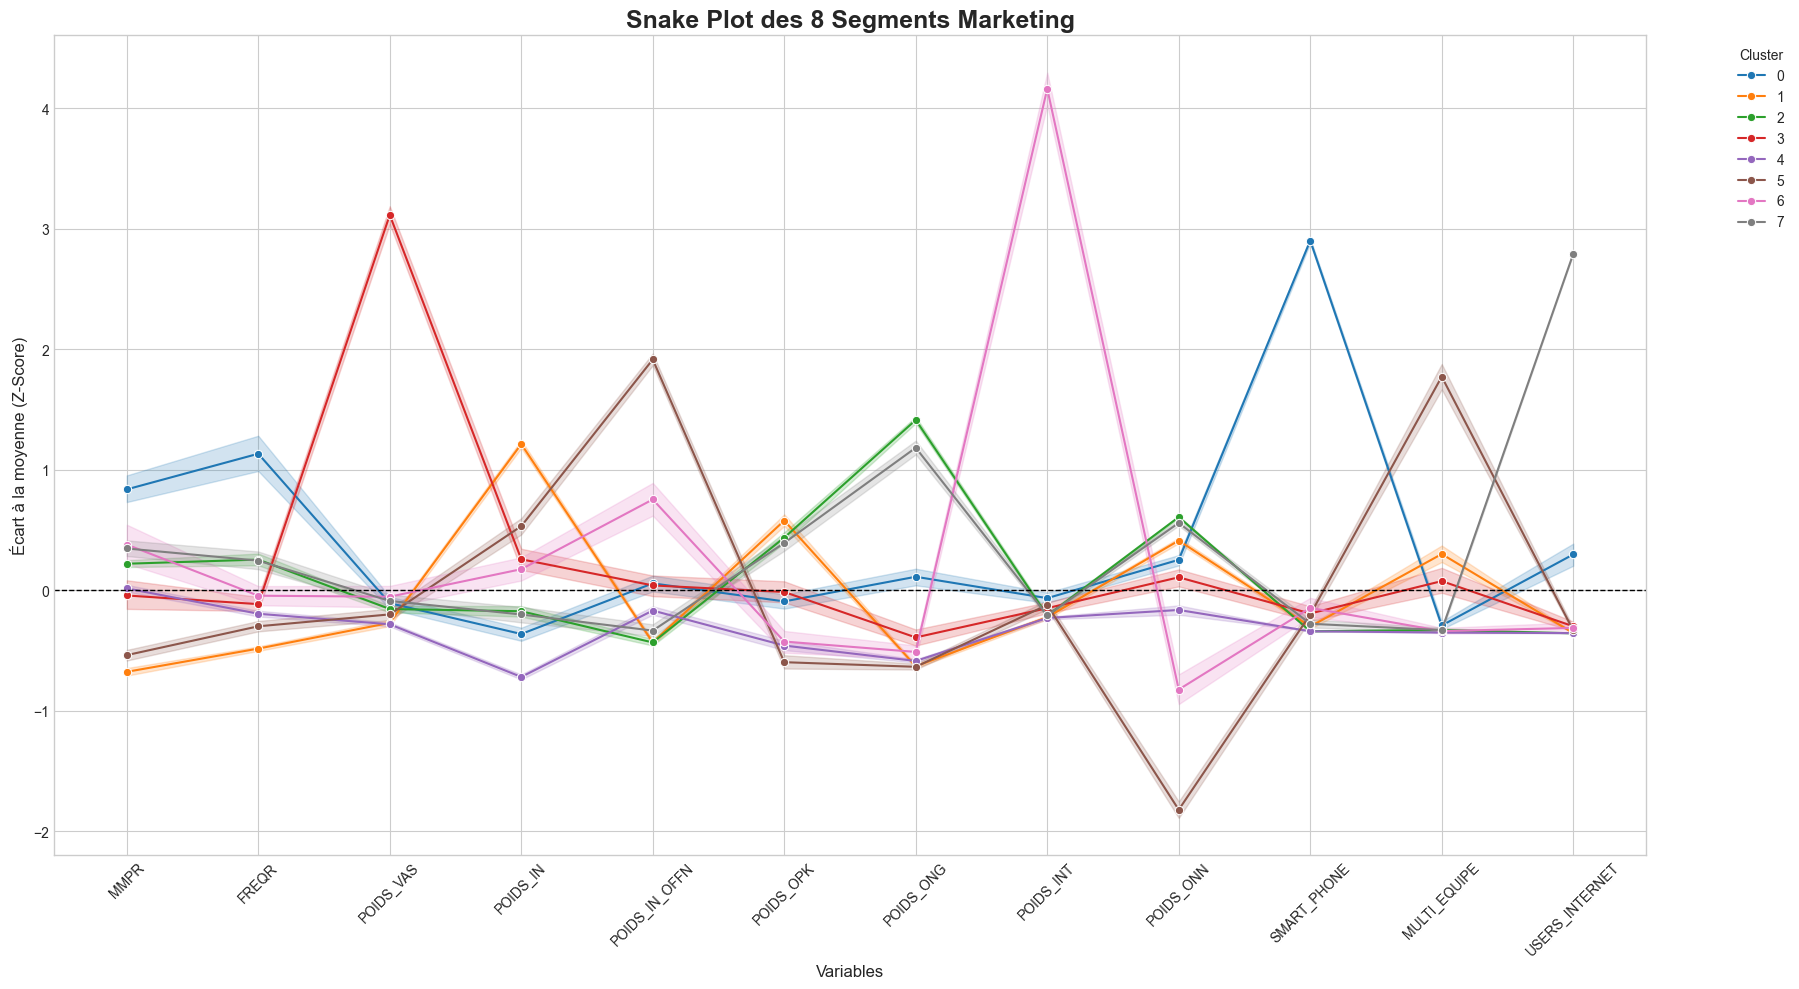

In [25]:
# Préparation des données pour le Snake Plot
# On reprend le DataFrame standardisé 'df_scaled' et on lui remet les clusters
df_scaled['Cluster'] = kmeans.labels_

# Transformation en format long pour Seaborn ('melt')
df_melt = pd.melt(df_scaled.reset_index(),
                  id_vars=['Cluster'],
                  value_vars=features,
                  var_name='Variable',
                  value_name='Valeur_Standardisee')

# Création du graphique
plt.figure(figsize=(18, 10))
sns.lineplot(x='Variable', y='Valeur_Standardisee', hue='Cluster', data=df_melt, palette='tab10', marker='o')

# Ajout d'une ligne de référence à 0 (moyenne globale)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.title('Snake Plot des 8 Segments Marketing', fontsize=18, fontweight='bold')
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Écart à la moyenne (Z-Score)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 7. Export des Résultats
Sauvegarde du fichier final avec la colonne `Cluster` et les labels marketing associés.

In [26]:
# Dictionnaire pour nommer les clusters (basé sur notre analyse)
# Adapte les noms si tu veux, c'est la "touche perso" du marketing !
noms_segments = {
    0: 'High Value Smartphone',
    1: 'Receveurs Low Cost',
    2: 'Appelants Off-Net',
    3: 'Fans de VAS',
    4: 'Standard On-Net',
    5: 'Zappeurs Multi-SIM',
    6: 'International',
    7: 'Data Users'
}

# Application des noms
df['Segment_Name'] = df['Cluster'].map(noms_segments)

# Aperçu final
display(df[['ID', 'MMPR', 'Cluster', 'Segment_Name']].head())

# Export vers CSV
df.to_csv('resultats_segmentation_cvm.csv', index=False)
print("Fichier 'resultats_segmentation_cvm.csv' exporté avec succès.")

,ID,MMPR,Cluster,Segment_Name
0,6.0,20.0,6,International
1,18.0,20.0,6,International
2,62.0,10.0,6,International
3,109.0,0.0,6,International
4,123.0,42.5,6,International


Fichier 'resultats_segmentation_cvm.csv' exporté avec succès.
